In [56]:
from part1 import get_starting_point

def take_one_step(layout, position):
    """Returns positions that can be reached from the current position.
    
    Takes care of infinite boundary condition.
    """
    set_new_pos = set()
    for dir in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
        new_pos = (position[0] + dir[0], position[1] + dir[1])
        # Support infinite boundary condition.
        new_pos_mod = (new_pos[0] % len(layout), new_pos[1] % len(layout[0]))
        if layout[new_pos_mod[0]][new_pos_mod[1]] != "#":
            set_new_pos.add(new_pos)

    return set_new_pos

In [57]:
filename = "input.txt"

lines = open(filename, encoding="utf-8").read().splitlines()
layout = [list(l) for l in lines]
start_position = get_starting_point(layout)

size = len(layout)

In [58]:
size
half_size = int((size - 1) / 2)

In [59]:
half_size

65

In [60]:
from tqdm import tqdm

curr_positions = {start_position}
list_num_positions = []
num_steps = size * 6
for i in tqdm(range(num_steps)):
    next_positions = set()
    for pos in curr_positions:
        out = take_one_step(layout, pos)
        # Add one by one; don't do union. Union is slow!
        for o in out:
            next_positions.add(o)

    curr_positions = next_positions

    step_num = i + 1
    if (step_num - half_size) % size == 0: 
        list_num_positions.append(len(curr_positions))

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 786/786 [09:19<00:00,  1.40it/s]


In [61]:
list_num_positions

[3734, 33285, 92268, 180683, 298530, 445809]

In [62]:
from scipy.optimize import curve_fit
import numpy as np

def func(x, a, b, c):
    return a * x * x + b * x + c

In [63]:
y = list_num_positions
x = np.arange(0, len(y))

popt, pcov = curve_fit(func, x, y)
print("popt")
print(popt)
print("pcov")
print(pcov)

popt
[14716. 14835.  3734.]
pcov
[[ 9.76553183e-24 -4.88276591e-23  3.25517728e-23]
 [-4.88276591e-23  2.64971430e-22 -2.14841700e-22]
 [ 3.25517728e-23 -2.14841700e-22  2.99476309e-22]]


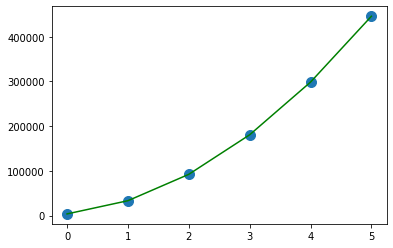

In [64]:
import matplotlib.pyplot as plt

plt.plot(x, y, ".", markersize=20, label='data')

plt.plot(
    x, func(x, *popt), 'g-',
    label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt)
)

In [65]:
num_steps = 26501365

print(round(func((num_steps - half_size) / size, *popt)))

602259568764234
